In [2]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
class Graph:
    def __init__(self):
        self.edges = {}

    def add_edge(self, node_a, node_b, weight):
        if node_a not in self.edges:
            self.edges[node_a] = {}
        self.edges[node_a][node_b] = weight

        if node_b not in self.edges:
            self.edges[node_b] = {}
        self.edges[node_b][node_a] = weight

    def breadth_first_search(self, start, end):
        visited = [start]
        queue = [[start]]

        if start == end:
            return queue[0]

        while queue:
            path = queue.pop(0)
            node = path[-1]

            for neighbor in self.edges[node]:
                if neighbor not in visited:
                    new_path = list(path)
                    new_path.append(neighbor)
                    queue.append(new_path)
                    visited.append(neighbor)
                    if neighbor == end:
                        return new_path

        return None

    def dijkstra(self, start, end):
        distances = {node: float('inf') for node in self.edges}
        distances[start] = 0
        queue = [(0, start)]

        while queue:
            current_distance, current_node = heapq.heappop(queue)

            if current_distance > distances[current_node]:
                continue

            for neighbor, weight in self.edges[current_node].items():
                distance = current_distance + weight

                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(queue, (distance, neighbor))

        path = []
        current_node = end

        while current_node != start:
            path.append(current_node)

            for neighbor, weight in self.edges[current_node].items():
                if distances[current_node] == distances[neighbor] + weight:
                    current_node = neighbor
                    break

        path.append(start)
        path.reverse()
        return path

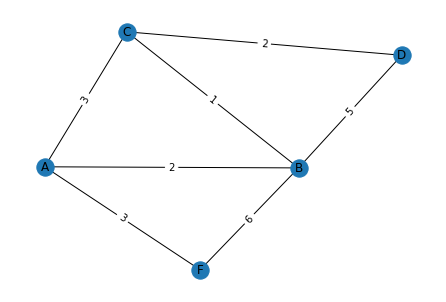

In [9]:
# создаем граф
g = Graph()
g.add_edge('A', 'B', 2)
g.add_edge('A', 'C', 3)
g.add_edge('B', 'C', 1)
g.add_edge('B', 'D', 5)
g.add_edge('C', 'D', 2)
g.add_edge('A', 'F', 3)
g.add_edge('F', 'B', 6)
# создаем графическое представление
G = nx.Graph()
for node, neighbors in g.edges.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

# отображаем граф
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [11]:
print(g.breadth_first_search('A', 'D')) # ['A', 'E']
print(g.dijkstra('A', 'D')) # ['A', 'C', 'D', 'E']

['A', 'B', 'D']
['A', 'C', 'D']
